In [0]:
#Import Section
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.linear_model import LinearRegression,BayesianRidge,ElasticNet,Lasso,SGDRegressor,Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA,KernelPCA
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor,RandomForestRegressor,VotingClassifier
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV,RandomizedSearchCV,StratifiedKFold,train_test_split
from sklearn.base import BaseEstimator,clone,TransformerMixin,RegressorMixin
from sklearn.svm import LinearSVR,SVR
from sklearn.preprocessing import StandardScaler
#import xgboost 
from xgboost import XGBRegressor
#Import Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
%matplotlib inline

In [0]:
train = pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

In [159]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [160]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


**EDA**

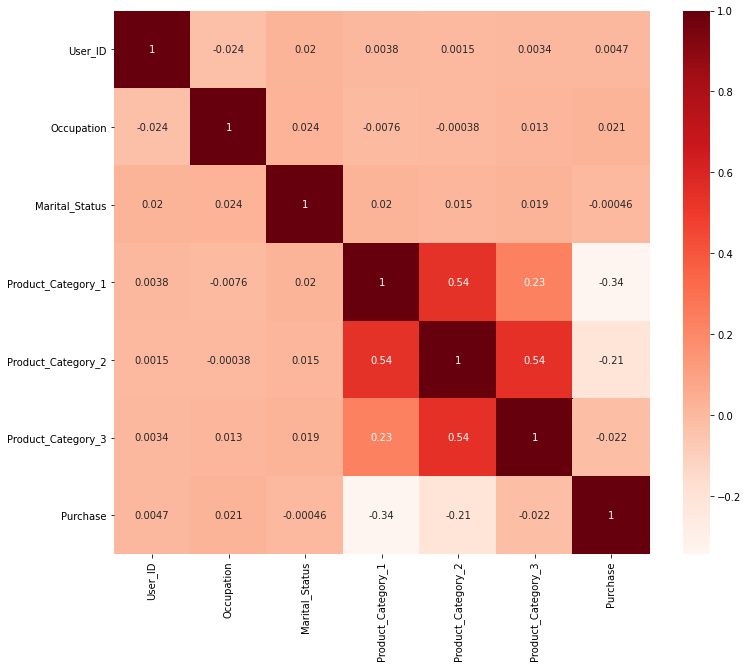

In [64]:
plt.figure(figsize=(12,10))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

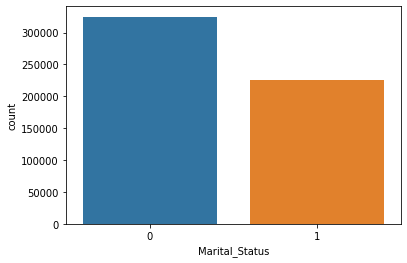

In [65]:
sns.countplot(data=train,x='Marital_Status')

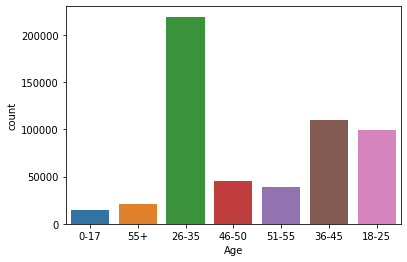

In [69]:
sns.countplot(data=train,x='Age')

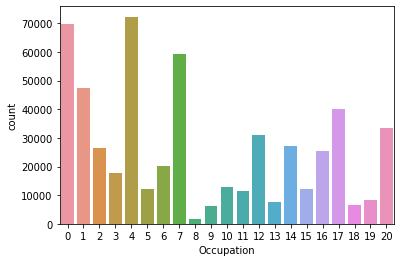

In [70]:
sns.countplot(data=train,x='Occupation')

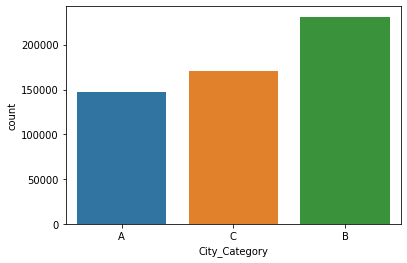

In [71]:
sns.countplot(data=train,x='City_Category')

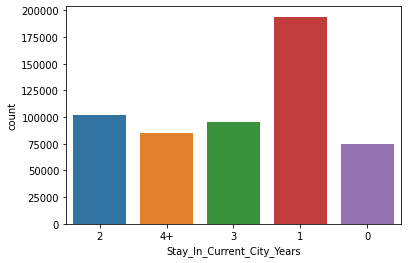

In [72]:
sns.countplot(data=train,x='Stay_In_Current_City_Years')

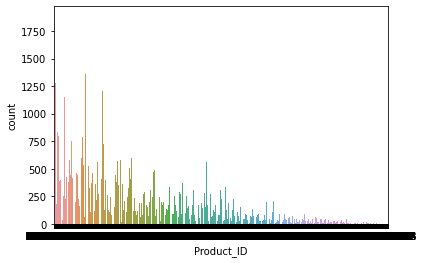

In [73]:
sns.countplot(data=train,x='Product_ID')

BIVARIATE ANALYSIS

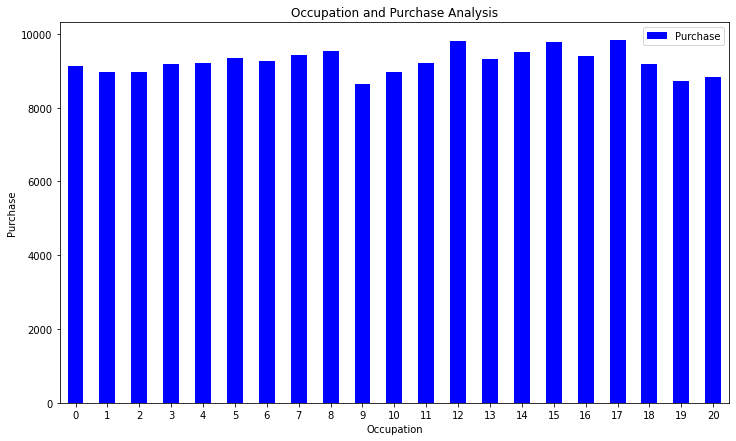

In [74]:
fig1 = \
new_df=train.pivot_table(index='Occupation', values="Purchase", aggfunc=np.mean)
fig1.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

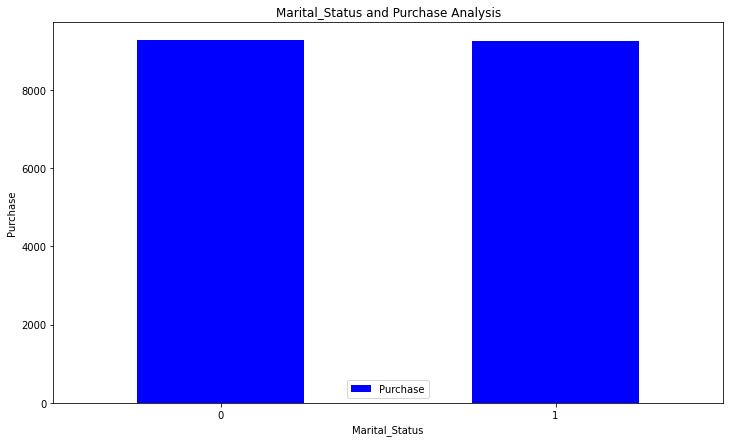

In [75]:
fig2 = \
new_df=train.pivot_table(index='Marital_Status', values="Purchase", aggfunc=np.mean)
fig2.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Marital_Status")
plt.ylabel("Purchase")
plt.title("Marital_Status and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

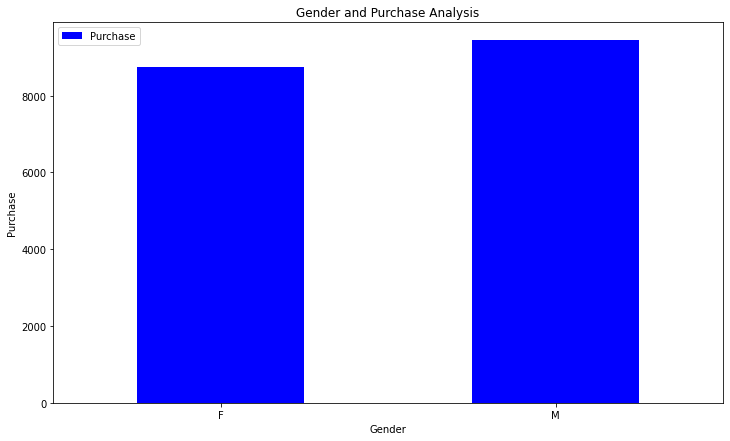

In [76]:
fig3 = \
new_df=train.pivot_table(index='Gender', values="Purchase", aggfunc=np.mean)
fig3.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Gender")
plt.ylabel("Purchase")
plt.title("Gender and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

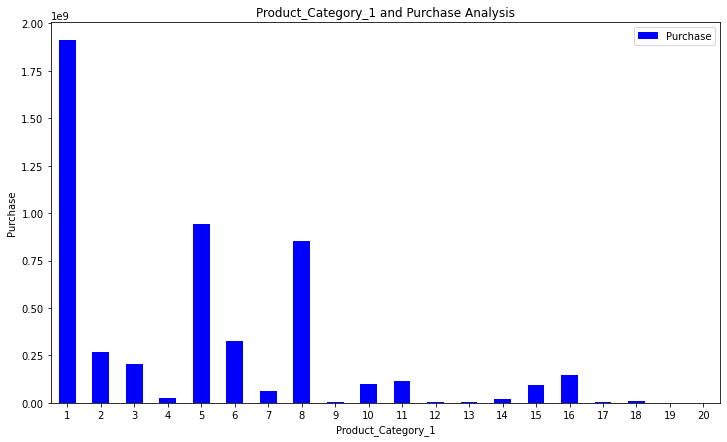

In [77]:
fig4 = \
train.pivot_table(index='Product_Category_1', values="Purchase", aggfunc=np.sum)
fig4.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Product_Category_1")
plt.ylabel("Purchase")
plt.title("Product_Category_1 and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

**Data PreProcessing**

In [161]:
# Join Train and Test Dataset
train['source']='train'
test['source']='test'
data = pd.concat([train,test], ignore_index = True, sort = False)
print(train.shape,test.shape, data.shape)

(550068, 13) (233599, 12) (783667, 13)


In [162]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [163]:
#Missing value treatment
missing_values = data.isnull().sum()
missing_values

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
source                             0
dtype: int64

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [0]:
# fill the missing value
columns=['Product_Category_2','Product_Category_3']
for col in columns:
  data[col].fillna(0,inplace= True)

In [128]:
#Apply function len(unique()) to every data variable
data.apply(lambda x: len(x.unique()))

Gender                         2
Age                            7
Occupation                    21
City_Category                  3
Stay_In_Current_City_Years     5
Marital_Status                 2
Product_Category_1            20
Product_Category_2            18
Product_Category_3            16
source                         2
dtype: int64

In [144]:
#To check the frequency of the features
#Print frequency of categories
for col in data:
 #Number of times each value appears in the column
 frequency = data[col].value_counts()
 print("\nThis is the frequency distribution for " + col + ":")
 print(frequency)



This is the frequency distribution for Gender:
M    590031
F    193636
Name: Gender, dtype: int64

This is the frequency distribution for Age:
26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

This is the frequency distribution for Occupation:
4     103086
0      98850
7      84127
1      67687
17     57418
20     47840
12     44448
14     38782
2      37996
16     36122
6      29102
3      25126
10     18304
5      17373
15     17356
11     16593
19     11919
13     11053
18      9367
9       8929
8       2189
Name: Occupation, dtype: int64

This is the frequency distribution for City_Category:
B    329739
C    243684
A    210244
Name: City_Category, dtype: int64

This is the frequency distribution for Stay_In_Current_City_Years:
1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64

This is the frequency distribution for Marital_Status:
0  

**Feature Engineering**

In [0]:
# coverting gender into binary
temp = []
for i in data.Gender:
    if i == 'M':
        temp.append(1)
    else:
        temp.append(0)
data['Gender'] = temp


In [0]:
# Converting city_category to numerical value
temp1 =[]
for i in data['City_Category']:
  if i=='A':
    temp1.append(0)
  elif i=='B':
    temp1.append(1)
  else:
    temp1.append(2)
data['City_Category']=temp1

In [0]:
#converting stay in current city years to numerical
stay_dict = {'0':0, '1':1, '2':2, '3':3, '4+':4}
data["Stay_In_Current_City_Years"] = data["Stay_In_Current_City_Years"].apply(lambda x: stay_dict[x])

In [0]:
# Converting age group to numerical
age_dict={'0-17':0,'18-25':1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6}
data['Age'] = data['Age'].apply(lambda x: age_dict[x])

In [169]:
data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source
0,1000001,P00069042,0,0,10,0,2,0,3,0.0,0.0,8370.0,train
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200.0,train
2,1000001,P00087842,0,0,10,0,2,0,12,0.0,0.0,1422.0,train
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,0.0,1057.0,train
4,1000002,P00285442,1,6,16,2,4,0,8,0.0,0.0,7969.0,train
5,1000003,P00193542,1,2,15,0,3,0,1,2.0,0.0,15227.0,train
6,1000004,P00184942,1,4,7,1,2,1,1,8.0,17.0,19215.0,train
7,1000004,P00346142,1,4,7,1,2,1,1,15.0,0.0,15854.0,train
8,1000004,P0097242,1,4,7,1,2,1,1,16.0,0.0,15686.0,train
9,1000005,P00274942,1,2,20,0,1,1,8,0.0,0.0,7871.0,train


In [0]:
def getCountVar(compute_df, count_df, var_name):
    grouped_df = count_df.groupby(var_name)
    count_dict = {}
    for name, group in grouped_df:
        count_dict[name] = group.shape[0]
        count_list = []
    for index, row in compute_df.iterrows():
        name = row[var_name]
        count_list.append(count_dict.get(name, 0))
    return count_list

In [0]:
#we’ll create a count column for each categorical feature to understand the model relation with features much better
#data[“User_ID_Count”] = getCountVar(data, data, “User_ID”)
data["Age_Count"] =getCountVar(data, data, "Age")
data["Occupation_Count"] =getCountVar(data, data, "Occupation")
data["Product_Category_1_Count"] =getCountVar(data, data,"Product_Category_1")
data["Product_Category_2_Count"] =getCountVar(data, data, "Product_Category_2")
data["Product_Category_3_Count"] =getCountVar(data, data,"Product_Category_3")
data["Product_ID_Count"] =getCountVar(data, data, "Product_ID")

In [0]:
# Now we can create the max and min of column User_ID, Product_ID and product_category_1
data["User_ID_MinPrice"] = data.groupby(['User_ID'])['Purchase'].transform('min')

data["User_ID_MaxPrice"] = data.groupby(['User_ID'])['Purchase'].transform('max')
 
data["Product_ID_MinPrice"] =data.groupby(['Product_ID'])['Purchase'].transform('min')

data["Product_ID_MaxPrice"] =data.groupby(['Product_ID'])['Purchase'].transform('max')

data["Product_Cat1_MaxPrice"] = data.groupby(['Product_Category_1'])['Purchase'].transform('max')

data["Product_Cat1_MeanPrice"] = data.groupby(['Product_Category_1'])['Purchase'].transform('mean')


In [188]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,source,Age_Count,Occupation_Count,Product_Category_1_Count,Product_Category_2_Count,Product_Category_3_Count,Product_ID_Count,User_ID_MinPrice,User_ID_MaxPrice,Product_ID_MinPrice,Product_ID_MaxPrice,Product_Cat1_MaxPrice,Product_Cat1_MeanPrice
0,1000001,P00069042,0,0,10,0,2,0,3,0.0,0.0,8370.0,train,21334,18304,28791,245982,545809,344,612.0,19219.0,2648.0,13716.0,13717.0,10096.705734
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200.0,train,21334,18304,200699,23575,26283,845,612.0,19219.0,3880.0,19701.0,19708.0,13606.218596
2,1000001,P00087842,0,0,10,0,2,0,12,0.0,0.0,1422.0,train,21334,18304,5610,245982,545809,150,612.0,19219.0,343.0,1776.0,1778.0,1350.859894
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,0.0,1057.0,train,21334,18304,5610,78834,545809,496,612.0,19219.0,365.0,1778.0,1778.0,1350.859894
4,1000002,P00285442,1,6,16,2,4,0,8,0.0,0.0,7969.0,train,30579,36122,162294,245982,545809,283,119.0,20657.0,3920.0,10073.0,10082.0,7498.958078


**EXPORTING DATA**

In [0]:
#Divide into test and train:
train_new = data.loc[data['source']=="train"]
test_new = data.loc[data['source']=="test"]
#Drop unnecessary columns:
test_new.drop(['source'],axis=1,inplace=True)
train_new.drop(['source'],axis=1,inplace=True)


In [0]:

#x_train =train_new.copy()
#y_train =train['Purchase']
#x_test = test_new.copy()
#y_test =train['Purchase']

In [0]:
#y_train

**MODELLING**

In [0]:
#Define target and ID columns:
target = 'Purchase'
IDcol = ['User_ID','Product_ID']
from sklearn import metrics
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
#Perform cross-validation:
    #cv_score = cross_validation.cross_val_score(alg, dtrain[predictors],(dtrain[target]) , cv=20, scoring='neg_mean_squared_error')
    #cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((dtrain[target]).values, dtrain_predictions)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])

    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv('decision_tree_model.csv', index=False)
    

**DECISION TREE MODEL**

In [194]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(DT, train_new, test_new, predictors, target, IDcol, 'DT.csv')


Model Report
RMSE : 2670
